In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\asus\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
X = df.drop('class', axis =1)


In [5]:
y = df['class']

In [6]:
X = pd.get_dummies(X,drop_first=True)

In [7]:
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
help(GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble._gb:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  GB builds an additive model in a
 |  forward stage-wise fashion; it allows for the optimization of
 |  arbitrary differentiable loss functions. In each stage ``n_classes_``
 |  regression trees are fit on the negative gradient of the
 |  binomial or multinomial deviance loss function. Binary classification
 |  is a special

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}


In [17]:
gb_model = GradientBoostingClassifier()

In [18]:
grid = GridSearchCV(gb_model,param_grid)

In [19]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [20]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [21]:
predictions = grid.predict(X_test)

In [22]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [24]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 1.74866113e-16, 0.00000000e+00, 0.00000000e+00,
       1.05006204e-16, 1.04902579e-03, 2.37943077e-17, 1.27734798e-06,
       0.00000000e+00, 0.00000000e+00, 1.05096010e-17, 2.49345344e-20,
       4.65636054e-17, 1.35003364e-21, 0.00000000e+00, 2.22085607e-08,
       2.31108859e-03, 5.13416525e-02, 6.24175887e-04, 1.39991156e-02,
       1.82499853e-02, 2.83431830e-07, 6.14744334e-01, 8.63939501e-03,
       0.00000000e+00, 0.00000000e+00, 5.41364665e-18, 1.25092906e-02,
       1.03950811e-02, 0.00000000e+00, 4.99195718e-17, 0.00000000e+00,
       1.00424659e-17, 0.00000000e+00, 0.00000000e+00, 2.15993409e-17,
       2.34194961e-16, 5.63492303e-22, 7.18904654e-18, 0.00000000e+00,
       4.13835786e-04, 5.54496437e-04, 1.35970415e-01, 0.00000000e+00,
       3.47128839e-02, 4.64723214e-04, 1.37910279e-03, 4.95063766e-06,
       1.83319493e-05, 0.00000000e+00, 3.14226215e-02, 3.67570419e-03,
       0.00000000e+00, 0.00000000e+00, 8.34201283e-04, 0.00000000e+00,
      

In [25]:
feat_import = grid.best_estimator_.feature_importances_

In [27]:
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])

In [28]:
imp_feats

,Importance
cap-shape_c,2.911502e-04
cap-shape_f,1.748661e-16
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,1.050062e-16
...,...
habitat_l,0.000000e+00
habitat_m,9.502332e-17
habitat_p,0.000000e+00
habitat_u,1.004851e-05


In [29]:
imp_feats.sort_values("Importance",ascending=False)

,Importance
odor_n,0.614744
stalk-root_c,0.135970
bruises_t,0.051342
stalk-root_r,0.034713
stalk-surface-below-ring_y,0.031423
...,...
gill-color_e,0.000000
veil-color_o,0.000000
odor_y,0.000000
gill-color_y,0.000000


In [30]:
imp_feats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Importance,95.0,0.010526,0.06463,0.0,0.0,2.220856e-08,0.000564,0.614744


In [32]:
imp_feats = imp_feats[imp_feats['Importance'] > 0.000527]

In [33]:
imp_feats.sort_values('Importance')

,Importance
stalk-root_b,0.000554
ring-number_t,0.000573
odor_c,0.000624
stalk-color-above-ring_n,0.000834
cap-surface_g,0.001049
population_c,0.001195
stalk-surface-above-ring_s,0.001379
cap-color_y,0.002311
stalk-color-below-ring_y,0.003025
stalk-color-below-ring_c,0.003381


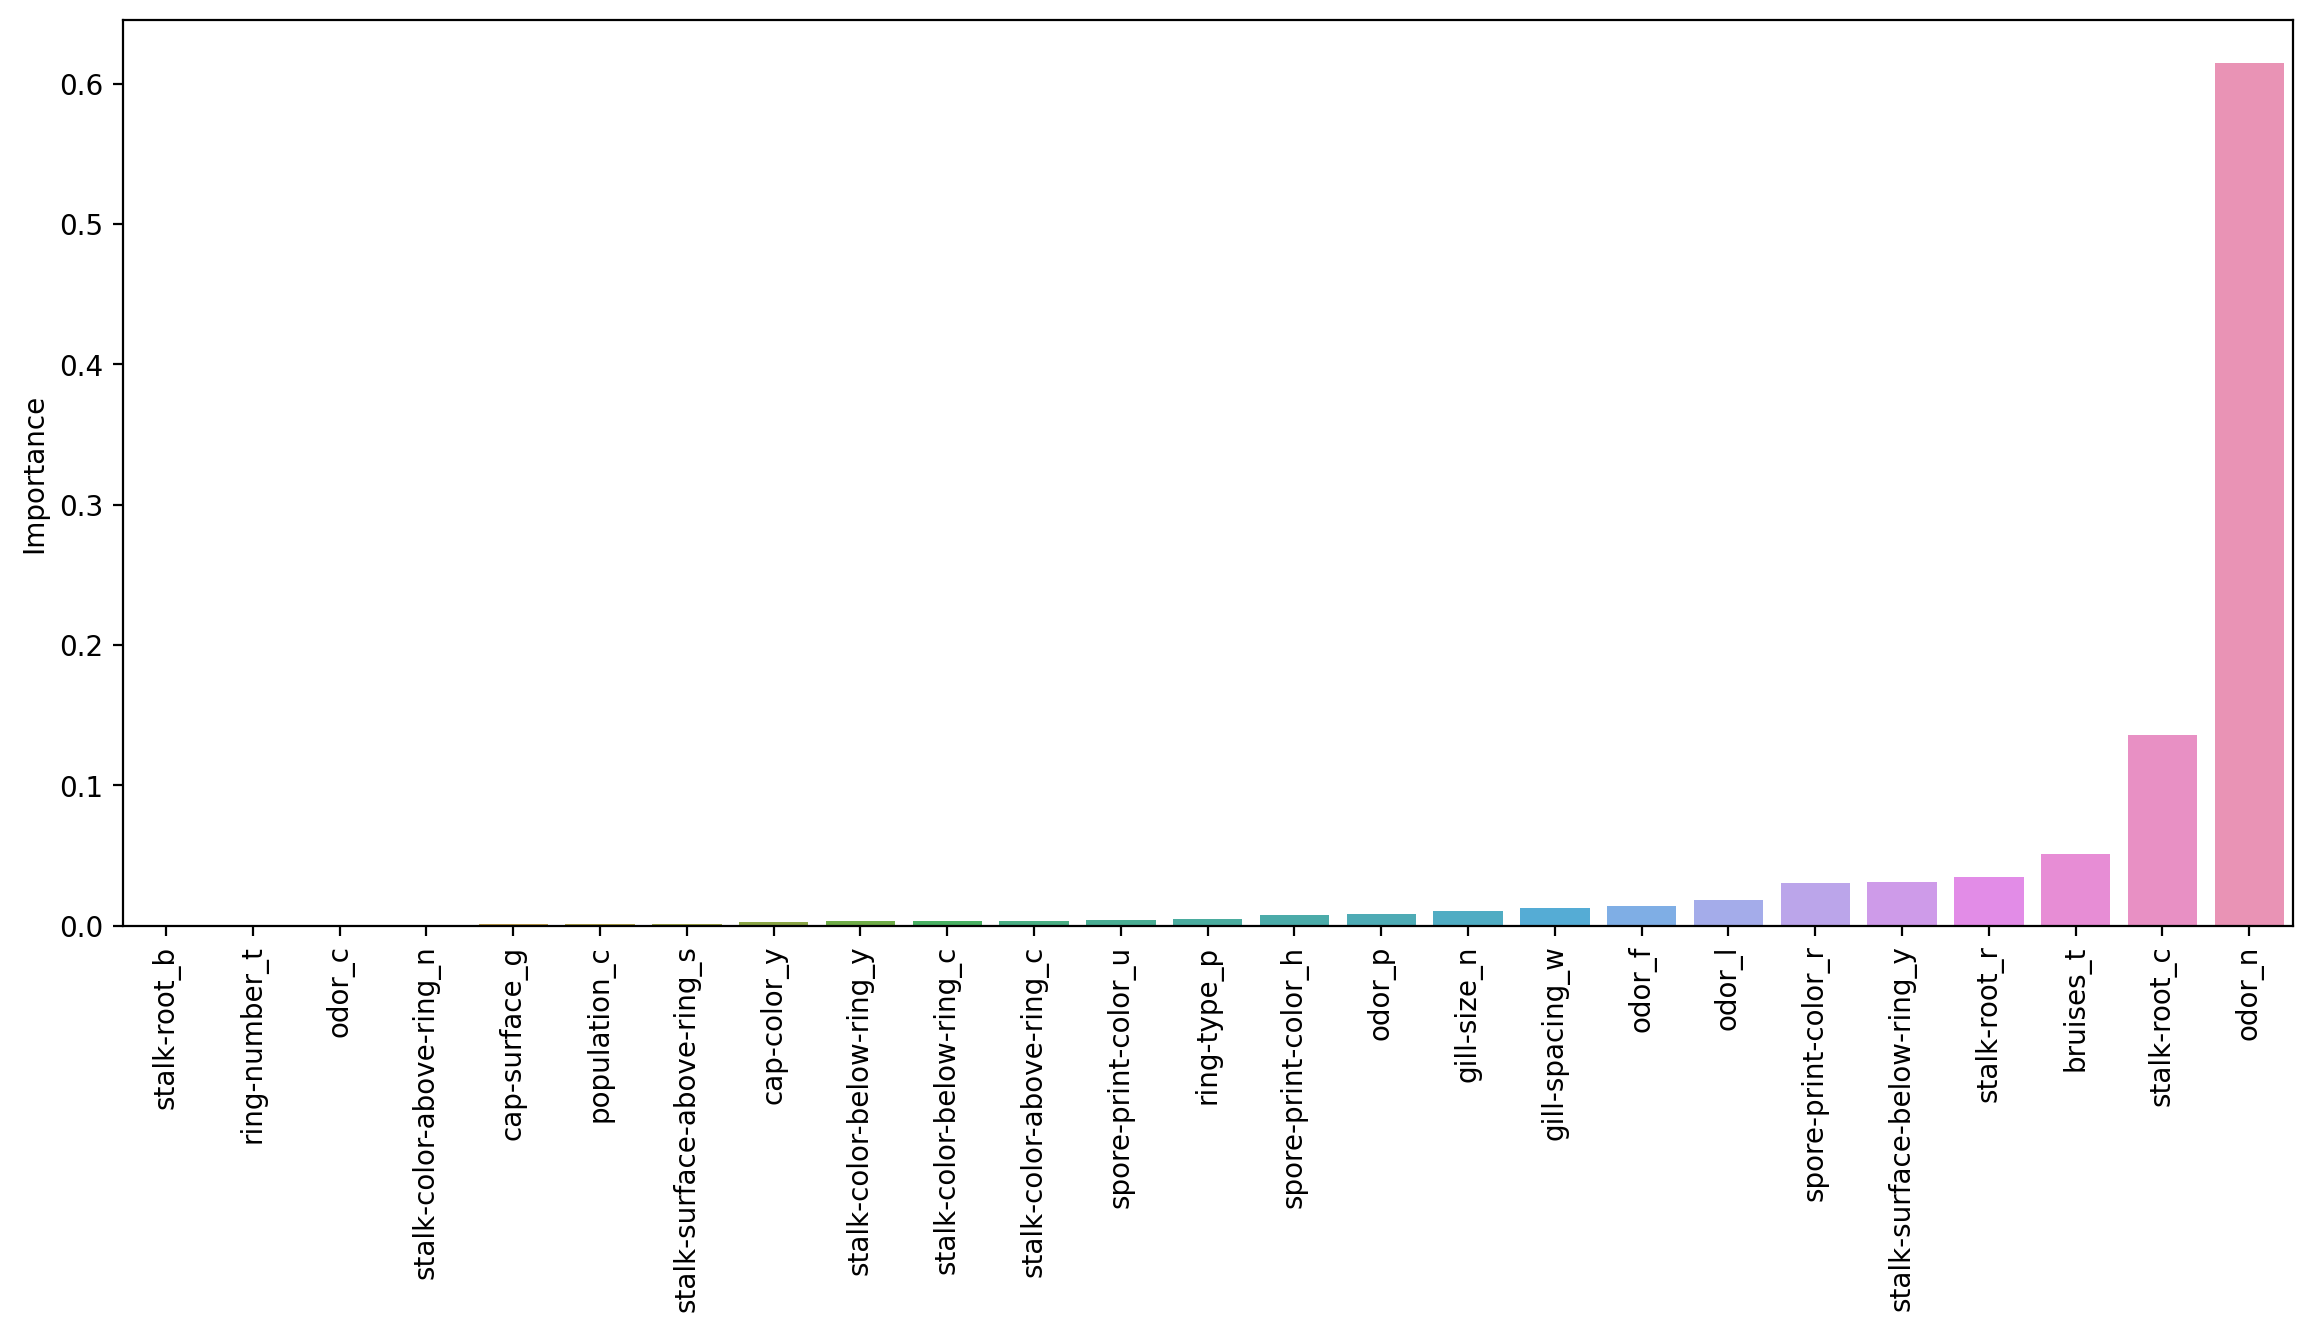

In [34]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);